In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#INPUT_FILE = "Lepší kampaň 69,65 TRS prostoje a měření.xlsx"
#PREFIX="Lepší kampaň" 

INPUT_FILE = "Horší kampaň 60,42 TRS prostoje a měření.xlsx"
PREFIX = "Horší kampaň"

In [3]:
df = pd.ExcelFile(INPUT_FILE).parse("Prostoje")[["Pracoviště","Počáteční datum","Koncové datum"]]
df.columns = ["Pracoviste", "Start", "End"]
df["Pracoviste"] = df["Pracoviste"].replace({
    'Lisování 7100': 'Lis', 
    'Mytí - Lakování 7200': 'Lak', 
    'Tisk 7300': 'Tisk',
    'Konifikace 7400': 'Konifikace'
})


In [4]:
df["Start"] = pd.to_datetime(df["Start"])
df["End"] = pd.to_datetime(df["End"])

# filter out the incorrect date (1970 in horsi kampan)
df = df[df["Start"].dt.year == 2023]
df = df[df["End"].dt.year == 2023]

df.to_csv(f"{PREFIX}_prostoje.csv", date_format="%Y-%m-%d %H:%M:%S.%f")

In [5]:
for i, row in df.iterrows():
    if row["Pracoviste"] == "Lis":
        if (row["Start"].year != 2023) or (row["End"].year != 2023):
            print(row["Start"].year, row["End"].year)

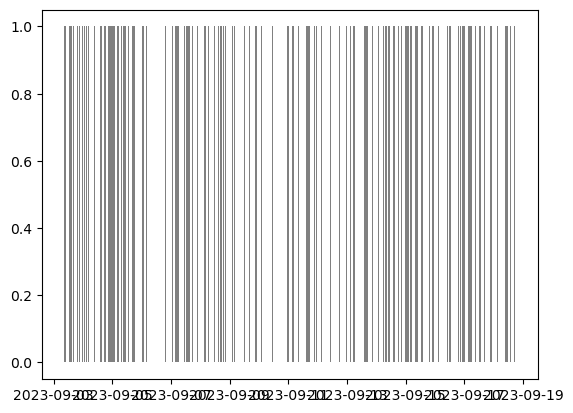

In [6]:
fig, ax = plt.subplots()
for i, row in df.iterrows():
    if row["Pracoviste"] == "Lis":
        ax.fill_betweenx(y=[0,1], x1=row["Start"], x2=row["End"], facecolor="gray")